In [ ]:
#Supervised Algo ---Regression ---continuous 
# Classification--values --0/1,
Train.  labelled 
Test --predict generate labels
Logistic Regression
Decision Tree--
Handle Imbalanced datasets --

#Unsupervised  algo
No labels


In [ ]:
Algorithm for Decision Tree
1. Its is a recursive procedure
2.Select root node from K features,select the feature with highest information Gain
3. At the next node ,from (k-1)features ,select the feature with highest information Gain 
4. Split the data on this feature 
5. Continue process until all the features are exhausted 

In [ ]:
Non obese   Obese
20          15
Calculate Gini index
=1-[20/35]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv('Loan.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#missing values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#dropping null values
df.dropna(inplace=True)

In [8]:
df.shape

(480, 13)

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
#Gender,married,Education,self employed,credit_history,Loanstatus

In [10]:
df=df[['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']]

In [11]:
df

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,Male,Yes,Graduate,No,1.0,N
2,Male,Yes,Graduate,Yes,1.0,Y
3,Male,Yes,Not Graduate,No,1.0,Y
4,Male,No,Graduate,No,1.0,Y
5,Male,Yes,Graduate,Yes,1.0,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,1.0,Y
610,Male,Yes,Graduate,No,1.0,Y
611,Male,Yes,Graduate,No,1.0,Y
612,Male,Yes,Graduate,No,1.0,Y


In [13]:
df.Gender.value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [14]:
df['Gender']=df['Gender'].replace(to_replace='Male',value='1')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/257846705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].replace(to_replace='Male',value='1')


In [16]:
df['Gender']=df['Gender'].replace(to_replace='Female',value='2')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/3105618905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender']=df['Gender'].replace(to_replace='Female',value='2')


In [17]:
df

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,Yes,Graduate,No,1.0,N
2,1,Yes,Graduate,Yes,1.0,Y
3,1,Yes,Not Graduate,No,1.0,Y
4,1,No,Graduate,No,1.0,Y
5,1,Yes,Graduate,Yes,1.0,Y
...,...,...,...,...,...,...
609,1,No,Graduate,No,1.0,Y
610,1,Yes,Graduate,No,1.0,Y
611,1,Yes,Graduate,No,1.0,Y
612,1,Yes,Graduate,No,1.0,Y


In [18]:
df['Married']=df['Married'].replace(to_replace='Yes',value='1')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/295122054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].replace(to_replace='Yes',value='1')


In [19]:
df['Married']=df['Married'].replace(to_replace='No',value='2')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/4151025671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']=df['Married'].replace(to_replace='No',value='2')


In [20]:
df.Education.value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [21]:
df['Education']=df['Education'].replace(to_replace='Graduate',value='1')
df['Education']=df['Education'].replace(to_replace='Not Graduate',value='2')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/1991420382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].replace(to_replace='Graduate',value='1')
C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/1991420382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']=df['Education'].replace(to_replace='Not Graduate',value='2')


In [22]:
df.Self_Employed.value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [23]:
df['Self_Employed']=df['Self_Employed'].replace(to_replace='No',value='1')
df['Self_Employed']=df['Self_Employed'].replace(to_replace='Yes',value='2')

C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/2001105415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed']=df['Self_Employed'].replace(to_replace='No',value='1')
C:\Users\LEENAS~1\AppData\Local\Temp/ipykernel_15380/2001105415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed']=df['Self_Employed'].replace(to_replace='Yes',value='2')


In [24]:
df.Credit_History = df.Credit_History.replace(to_replace='0.0', value='1')
df.Credit_History = df.Credit_History.replace(to_replace='1.0', value='2')


C:\Users\Leena Shibu\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df.Loan_Status = df.Loan_Status.replace(to_replace='N', value='0')
df.Loan_Status = df.Loan_Status.replace(to_replace='Y', value='1')

In [26]:
df.Loan_Status=df.Loan_Status.astype('int')

In [27]:
df

,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status
1,1,1,1,1,1.0,0
2,1,1,1,2,1.0,1
3,1,1,2,1,1.0,1
4,1,2,1,1,1.0,1
5,1,1,1,2,1.0,1
...,...,...,...,...,...,...
609,1,2,1,1,1.0,1
610,1,1,1,1,1.0,1
611,1,1,1,1,1.0,1
612,1,1,1,1,1.0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          480 non-null    object 
 1   Married         480 non-null    object 
 2   Education       480 non-null    object 
 3   Self_Employed   480 non-null    object 
 4   Credit_History  480 non-null    float64
 5   Loan_Status     480 non-null    int32  
dtypes: float64(1), int32(1), object(4)
memory usage: 24.4+ KB


In [32]:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df.Loan_Status

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
clf.feature_importances_

array([0.        , 0.02115343, 0.00528539, 0.01248463, 0.96107655])

In [41]:
from sklearn.metrics import classification_report
train_pred=clf.predict(X_train)
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60       104
           1       0.80      0.97      0.88       232

    accuracy                           0.81       336
   macro avg       0.84      0.72      0.74       336
weighted avg       0.82      0.81      0.79       336



In [42]:
test_pred=clf.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        44
           1       0.78      1.00      0.87       100

    accuracy                           0.80       144
   macro avg       0.89      0.67      0.69       144
weighted avg       0.84      0.80      0.76       144



In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion matrix",confusion_matrix(y_test,test_pred))
print("Accuracy score ",accuracy_score(y_test,test_pred))

confusion matrix [[ 15  29]
 [  0 100]]
Accuracy score  0.7986111111111112


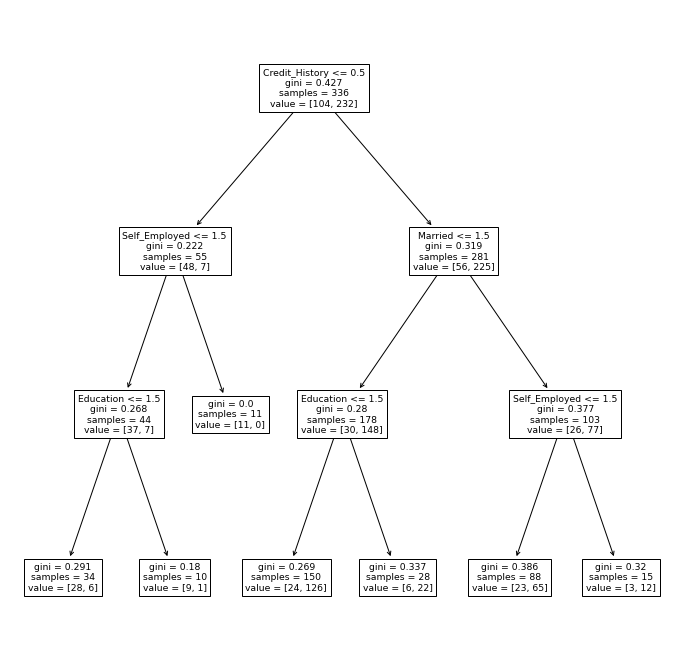

In [45]:
from sklearn.tree import plot_tree
plt.figure(figsize = (12,12))
plot_tree(clf,feature_names=X.columns);


In [ ]:
2 ways measure purity of a node
entropy and Gini 
entropy  Min value 

Gini min value 
default criteria --

